In [1]:
import numpy
from matplotlib import pyplot
import ipywidgets

import calibr8

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


# The Generalized Logistic Function
Real-world calibration curves rarely follow linear dose/response relationships, but often exhibit lower & upper saturations.
These relationships can be described with S-shaped functions.
The logistic function (the _sigmoid curve_ is a special case of it) is often well suited for real-world calibration curves.

Several different flavors of S-shaped curves are available:
+ [sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) (1 parameter: variable slope)
+ [logistic](https://en.wikipedia.org/wiki/Logistic_function) (3 parameters: variable upper limit, variable x-value of the inflection point, variable slope)
+ [generalized logistic](https://en.wikipedia.org/wiki/Generalised_logistic_function) (5 parameters: variable limits, variable inflection point, variable slope, variable symmetry)

Here, we're going to use the generalized logistic, because it is most useful. However, we use a different parametrization that is derived in the notebook `Background_AsymmetricLogistic`.

$$f(x)= L_L \cdot (L_U - L_L) \cdot (e^{(\frac{S}{L_U - L_L} (I_{x} - x) + c (e^{c} + 1)^{-(e^{c} + 1) e^{- c}}) (e^{c} + 1)^{(e^{c} + 1) e^{- c}}} + 1)^{- e^{- c}} $$

The following table shows the bounds & interpretation of its 5 paramters:

| parameter     | interpretation
| ----- | -- |
| $L_L \in \mathcal{R}$ | lower asymptote |
| $L_U \in \mathcal{R}$ | upper asymptote |
| $I_x \in \mathcal{R}$ | x-value of the inflection point |
| $S \in \mathcal{R}$ | slope at the inflection point `I_x` |
| $c \in \mathcal{R}$ | moves the inflection point closer to `L_L` (`c < 0`) or closer to `L_U` (`0 < c`). |


## Example
Let's say we have an assay with noticeable lower- and upper satuation limits, as well as some asymmetry.

To visualize the meaning of the parameters, we can draw an interactive plot of the `calibr8.asymmetric_logistic` function:

In [2]:
help(calibr8.asymmetric_logistic)

Help on function asymmetric_logistic in module calibr8.core:

asymmetric_logistic(x, theta)
    5-parameter asymmetric logistic model.
    
    Parameters
    ----------
    x : array-like
        independent variable
    theta : array-like
        parameters of the logistic model
            L_L: lower asymptote
            L_U: upper asymptote
            I_x: x-value at inflection point
            S: slope at the inflection point
            c: symmetry parameter (0 is symmetric)
    
    Returns
    -------
    y : array-like
        dependent variable



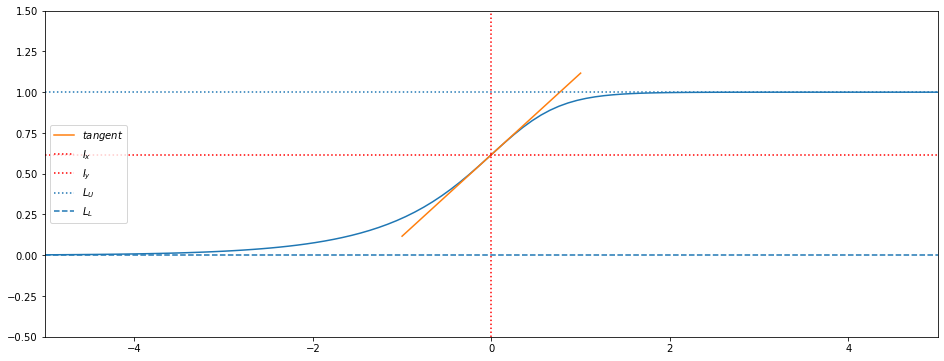

interactive(children=(FloatSlider(value=0.0, description='L_L', max=0.0, min=-5.0), FloatSlider(value=1.0, des…

In [3]:
def tangent(I_x, I_y, S):
    """Get x,y to plot a line with slope S around the coordinate <I_x,I_y>."""
    x = numpy.linspace(I_x-1,I_x+1,2)
    y = -S*I_x + I_y + S*x
    return x, y

def plot_logistic(L_L=0, L_U=1, I_x=0.0, S=0.5, c=1.0):
    theta = (L_L, L_U, I_x, S, c)
    X_MIN, X_MAX = -5, 5
    X = numpy.linspace(-5, 5, 100)
    
    # get key properties to visualize
    I_y = calibr8.asymmetric_logistic(I_x, theta)
    
    fig, ax = pyplot.subplots(figsize=(16,6))
    ax.plot(X, calibr8.asymmetric_logistic(X, theta))
    ax.plot(*tangent(I_x, I_y, S), label='$tangent$')
    
    ax.axvline(I_x, linestyle=':', color='red', label='$I_x$')
    ax.axhline(I_y, linestyle=':', color='red', label='$I_y$')
    ax.axhline(L_U, linestyle=':', label='$L_U$')
    ax.axhline(L_L, linestyle='--', label='$L_L$')
    
    ax.set_xlim(X_MIN, X_MAX)
    ax.set_ylim(L_L-0.5, L_U+0.5)
    ax.legend(loc='center left')
    pyplot.show()

plot_logistic()
ipywidgets.interact(
    plot_logistic,
    L_L=(-5.0,0),
    L_U=(0.0,5),
    I_x=(-5.0, 5),
    S=(-2.0, 3),
    c=(-2.0, 2)
);

## Summary
+ The generalized logistic function can describe relationships with lower & upper satuation
+ Even in cases of "good linear relationships", the GLF is applicable
+ The original parameterization is not very intuitive, but was reparameterized such that 4 of 5 parameters are interpretable

In [4]:
%load_ext watermark
%watermark -n -u -v -iv -w

Last updated: Wed Feb 23 2022

Python implementation: CPython
Python version       : 3.8.12
IPython version      : 7.31.0

matplotlib: 3.5.1
sys       : 3.8.12 | packaged by conda-forge | (default, Oct 12 2021, 21:22:46) [MSC v.1916 64 bit (AMD64)]
ipywidgets: 7.6.5
calibr8   : 6.4.0
numpy     : 1.20.3

Watermark: 2.3.0

